## the center of the largest inscribing ball of a polyhedron

Let $A\in\mathbb{R}^{m\times 2}$ and $b\in\mathbb{R}^m$ describe the ployhedron (polytope)
$$Q=\{x\in\mathbb{R}^2:\ Ax\leq b\}.$$ 
Compute the center of the largest inscribing ball (circle) of $Q$. In this task, we consider Euclidean balls of the form
$$B(c,r) = \{x:\mathbb{R}^2:\ \Vert x-c\Vert_2 \leq r\}$$
for a center $c\in\mathbb{R}^2$ and radius $r>0$.

_Hint_: Try to formulate this problem as a [linear program](https://en.wikipedia.org/wiki/Linear_programming) and use `scipy.optimize.linprog` to solve it.

In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# m=6, p=2

# Define the polyhedron by the intersection points
points = np.array([[7, 7], [8, 1], [4, -3], [-2, -1.5], [-4, 3],[-2, 8.5]])
# Convert to homogeneous coordinates
points = np.concatenate([points, np.ones((points.shape[0], 1))], -1)
# Compute the line touching two neighboring intersection points
lines = np.cross(points, np.roll(points, shift=1, axis=0))
# The polyhedron is specified by
A = -lines[:,:2]
b = lines[:, 2]
lines

array([[-1.5, -9. , 73.5],
       [-6. , -1. , 49. ],
       [-4. ,  4. , 28. ],
       [ 1.5,  6. , 12. ],
       [ 4.5,  2. , 12. ],
       [ 5.5, -2. , 28. ]])

In [8]:
# Compute solution
from scipy.optimize import linprog 
# minimize a linear objective function subject to 
# linear equality and inequality constraints

def center(A, b):
    A_norms = np.sqrt(np.sum(A**2, axis=1))
    A_ub = np.vstack((A_norms, A.T)).T
    b_ub = b
    c = np.array([-1, 0, 0])
    out = linprog(c, A_ub=A_ub, b_ub=b)
    
    return out['x'][1:], out['x'][0]

x, r = center(A, b)
x, r


(array([2.44412283, 2.61721026]), 5.072138762328725)

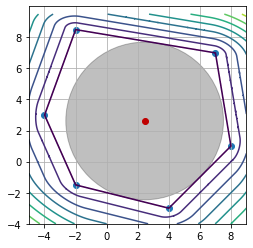

In [9]:
# Plot the set Q
xmin, xmax =  points[:,0].min()-1, points[:,0].max()+1
ymin, ymax =  points[:,1].min()-1, points[:,1].max()+1
xx, yy = np.mgrid[xmin:xmax:0.01,ymin:ymax:0.01,]
xy = np.stack([xx.ravel(), yy.ravel()], 0)

constraint = np.maximum(A @ xy - b[:, None], 0)
constraint = np.sqrt(np.sum(constraint**2, 0))
constraint = np.reshape(constraint, xx.shape)

fig, ax = plt.subplots()

ax.scatter(points[:,0], points[:,1])
ax.contour(xx, yy, constraint)
ax.axis('square')
ax.grid('on')

ax.scatter(x[0], x[1], c='red')
ax.add_patch(plt.Circle(x, r, color='black', alpha=0.25))


In [10]:
## for controling the results :) 

##!/usr/bin/env python
#from gurobipy import Model, GRB
#from math import sqrt
#
#vertices = [(7,7), (8,1), (4,-3), (-2,-1.5), (-4,3), (-2, 8.5)]
#
#edges = zip(vertices, vertices[1:] + [vertices[0]])
#
#m = Model()
#r = m.addVar()
#x = m.addVar(lb=-GRB.INFINITY)
#y = m.addVar(lb=-GRB.INFINITY)
#m.update()
#
#for (x1, y1), (x2, y2) in edges:
#    dx = x2 - x1
#    dy = y2 - y1
#    m.addConstr((dx*y - dy*x) + (r * sqrt(dx**2 + dy**2)) <= dx*y1 - dy*x1)
#
#m.setObjective(r, GRB.MAXIMIZE)
#m.optimize()
#
#print ('r = %f' % r.x)
#print ('(x, y) = (%f, %f)' % (x.x, y.x))
#